# Employee work life analysis

## Introduction
In the pursuit of understanding the intricacies of a company's culture and the experiences of its employees, the extraction and summarization of work-life anecdotes emerge as a valuable undertaking. In this phase of the project, we delve into the narratives of individuals who have been part of various organizations, gathering insights that encapsulate the essence of their professional journeys. To accomplish this, we employ a combination of web scraping, data extraction, and text summarization techniques, augmented by popular libraries and methodologies in the realm of Natural Language Processing (NLP). By employing these methods, we aim to provide concise and insightful summaries of employees' experiences, enabling a deeper comprehension of the working environments, challenges, and successes that define a company's culture.

## Web Scraping Quora blog posts

### Input the company name

In [4]:
company = input("Which company's employee experiences do you want to know about?")

Which company's employee experiences do you want to know about? google


In [5]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

url = f"https://www.quora.com/search?q=what%20is%20it%20like%20working%20at%20{company}"

# Initialize a headless browser 
driver = webdriver.Chrome()  

driver.get(url)

wait = WebDriverWait(driver, 10)
wait.until(EC.presence_of_element_located((By.CLASS_NAME, "qu-userSelect--text")))

page_source = driver.page_source
soup = BeautifulSoup(page_source, "html.parser")

button_elements = driver.find_elements(By.XPATH, "//div[@class='q-text qu-cursor--pointer QTextTruncated__StyledReadMoreLink-sc-1pev100-3 dXJUbS qt_read_more qu-color--blue_dark qu-fontFamily--sans qu-pl--tiny']")

company_blog_posts=[]
for button_element in button_elements[:10]:
    button_element.click()  
    
page_source = driver.page_source
# Get the page source after dynamic content has loaded
soup = BeautifulSoup(page_source, "html.parser")

div_elements = soup.find_all('div', class_='q-box spacing_log_answer_content puppeteer_test_answer_content')
for div_element in div_elements[:100]:
    company_blog_posts.append(div_element.get_text())

for c in company_blog_posts:
    print("Found a matching div element:")
    print(c)
    print("---")



Found a matching div element:
I have never worked anywhere apart from Google, so I cannot draw a comparison but here is what I think. Pros :I get to work with a set of people who always make me feel shit about myself and make me realize that I know very little. When I joined Google, I suffered from Imposter’s syndrome. I am always out of my comfort zone here. I always know how I can improve. It helps me grow and learn faster.The degree of freedom I have regarding what I want to work on is spectacular. Changing project / team is relatively easier here. I can choose to spend 20% of my time on anything I want.The food and other much talked about perks of Google actually help me improve my productivity. I feel like my employer cares about me and I would like to return the favor. There is even an internal website for employees that talk about how to waste time at Google in a good way.The company invests in growth of it’s employees. There are tons of learning resources. People volunteer to m

Note that we have extracted raw blog posts and have stored it in company_blog_posts. 

## Pre-Processing of extracted data (Removal of stop words and tokenisation)

In my code, I have incorporated the NLTK library's Stop words and Punkt tokenizer for effective text processing. 
<br/> **Stop words** removal plays a crucial role in enhancing the quality of textual analysis by filtering out common words that carry little semantic meaning, thus allowing a focus on more significant terms. 
<br/> **Punkt Sentence Tokenizer** helps to process the abbreviation words, upper case characters, collocations, special characters, whitespaces and many more, making it particularly effective summarisation.

These preprocessing steps contribute to the efficiency and precision of natural language processing tasks, ensuring a more refined understanding of the underlying text.

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def process_review(review):
    words = word_tokenize(review)
    filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    summary = ' '.join(filtered_words)
    return summary

cummulative_pp = ''
for review in company_blog_posts:
    summary = process_review(review)
    cummulative_pp += summary + ' '

individual_post_pp = [process_review(review) for review in company_blog_posts]

# Display individual summaries
print("\nPreprocessed Individual Blogs")
for i, summary in enumerate(individual_post_pp, start=1):
    print(f"{i}: {summary}\n")




Preprocessed Individual Blogs
1: never worked anywhere apart google draw comparison think pros get work set people always make feel shit make realize know little joined google suffered imposter syndrome always comfort zone always know improve helps grow learn degree freedom regarding want work spectacular changing project team relatively easier choose spend 20 time anything food much talked perks google actually help improve productivity feel like employer cares would like return favor even internal website employees talk waste time google good company invests growth employees tons learning resources people volunteer mentor others access code ever written google several voluntary trainings bottleneck learning googley culture amazing people worked google high ethical moral standards system continuous feedback people trying pull people often get rewarded recognized via public thank sufficient number channels bubble ideas concerns appropriate mailing list almost everything game thrones c

[nltk_data] Downloading package stopwords to C:\Users\Aishika
[nltk_data]     Nandi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Aishika
[nltk_data]     Nandi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Summarizer (Pre-Trained Bart-Large model)

### Summarisation on raw blogs 

In [1]:
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset("multi_news")
print(f"Features: {dataset['train'].column_names}")

Features: ['document', 'summary']


C:\Users\Aishika Nandi\AppData\Local\Programs\Python\Python311\Lib\site-packages\datasets\table.py:1421: FutureWarning: promote has been superseded by mode='default'.
  table = cls._concat_blocks(blocks, axis=0)


In [2]:
dataset

DatasetDict({
    train: Dataset({
        features: ['document', 'summary'],
        num_rows: 44972
    })
    validation: Dataset({
        features: ['document', 'summary'],
        num_rows: 5622
    })
    test: Dataset({
        features: ['document', 'summary'],
        num_rows: 5622
    })
})

In [3]:
sample = dataset["train"][1]
print(f"""Document (excerpt of 2000 characters, total length: {len(sample["document"])}):""")
print(sample["document"][:2000])
print(f'\nSummary (length: {len(sample["summary"])}):')
print(sample["summary"])

Document (excerpt of 2000 characters, total length: 5353):
LOS ANGELES (AP) — In her first interview since the NBA banned her estranged husband, Shelly Sterling says she will fight to keep her share of the Los Angeles Clippers and plans one day to divorce Donald Sterling. 
 
 (Click Prev or Next to continue viewing images.) 
 
 ADVERTISEMENT (Click Prev or Next to continue viewing images.) 
 
 Los Angeles Clippers co-owner Shelly Sterling, below, watches the Clippers play the Oklahoma City Thunder along with her attorney, Pierce O'Donnell, in the first half of Game 3 of the Western Conference... (Associated Press) 
 
 Shelly Sterling spoke to Barbara Walters, and ABC News posted a short story with excerpts from the conversation Sunday. 
 
 NBA Commissioner Adam Silver has banned Donald Sterling for making racist comments and urged owners to force Sterling to sell the team. Silver added that no decisions had been made about the rest of Sterling's family. 
 
 According to ABC's story, Sh

In [4]:
from transformers import BartForConditionalGeneration, AutoTokenizer

model_ckpt = "sshleifer/distilbart-cnn-6-6"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = BartForConditionalGeneration.from_pretrained(model_ckpt)

In [5]:
d_len = [len(tokenizer.encode(s)) for s in dataset["validation"]["document"]]
s_len = [len(tokenizer.encode(s)) for s in dataset["validation"]["summary"]]

Token indices sequence length is longer than the specified maximum sequence length for this model (2331 > 1024). Running this sequence through the model will result in indexing errors


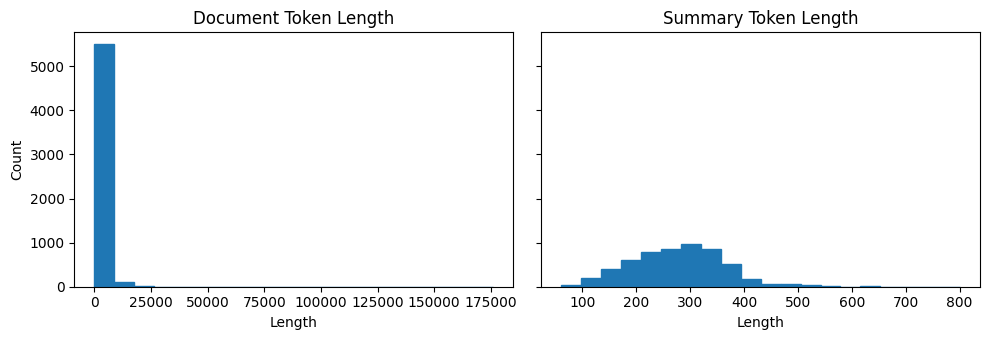

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3.5), sharey=True)
axes[0].hist(d_len, bins=20, color="C0", edgecolor="C0")
axes[0].set_title("Document Token Length")
axes[0].set_xlabel("Length")

axes[0].set_ylabel("Count")
axes[1].hist(s_len, bins=20, color="C0", edgecolor="C0")
axes[1].set_title("Summary Token Length")
axes[1].set_xlabel("Length")
plt.tight_layout()
plt.show()

In [8]:
def convert_examples_to_features(example_batch):
    input_encodings = tokenizer(example_batch["document"], max_length=1024, truncation=True)
    
    with tokenizer.as_target_tokenizer():
        target_encodings = tokenizer(example_batch["summary"], max_length=256, truncation=True)
        
    return {"input_ids": input_encodings["input_ids"], 
           "attention_mask": input_encodings["attention_mask"], 
           "labels": target_encodings["input_ids"]}

dataset_tf = dataset.map(convert_examples_to_features, batched=True)

Map:   0%|          | 0/5622 [00:00<?, ? examples/s]

C:\Users\Aishika Nandi\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:3856: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [9]:
columns = ["input_ids", "labels", "attention_mask"]
dataset_tf.set_format(type="torch", columns=columns)

In [10]:
from transformers import DataCollatorForSeq2Seq
seq2seq_data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [11]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir='bart-multi-news', num_train_epochs=1, warmup_steps=500, 
                                  per_device_train_batch_size=1, per_device_eval_batch_size=1, 
                                  weight_decay=0.01, logging_steps=10, push_to_hub=False, 
                                  evaluation_strategy='steps', eval_steps=500, save_steps=1e6, 
                                  gradient_accumulation_steps=16)

In [ ]:
trainer = Trainer(model=model, args=training_args, tokenizer=tokenizer, 
                  data_collator=seq2seq_data_collator, 
                  train_dataset=dataset_tf["train"], 
                  eval_dataset=dataset_tf["validation"])
trainer.train()

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
sample_text = dataset["test"][1]["document"]
reference = dataset["test"][1]["summary"]

input_ids = tokenizer(sample_text, max_length=1024, truncation=True, 
                   padding='max_length', return_tensors='pt').to(device)
summaries = model.generate(input_ids=input_ids['input_ids'], 
                           attention_mask=input_ids['attention_mask'], 
                           max_length=256)

decoded_summaries = [tokenizer.decode(s, skip_special_tokens=True, 
                                      clean_up_tokenization_spaces=True) 
                    for s in summaries]

print("Document:")
print(sample_text)
print("\nReference Summary:")
print(reference)
print("\nModel Summary:")
print(decoded_summaries[0])

# Training Model for summarisation 

In [ ]:
!pip install --user transformers==4.20.0
!pip install --user keras_nlp==0.3.0
!pip install datasets
!pip install huggingface-hub
!pip install rouge-score

In [ ]:
import os
import logging

import nltk
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Only log error messages
tf.get_logger().setLevel(logging.ERROR)

os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [ ]:
TRAIN_TEST_SPLIT = 0.1  

MAX_INPUT_LENGTH = 1024  
MIN_TARGET_LENGTH = 5  
MAX_TARGET_LENGTH = 128  
BATCH_SIZE = 8         
LEARNING_RATE = 2e-5    
MAX_EPOCHS = 2          

MODEL_CHECKPOINT = "t5-small"  


In [ ]:
from datasets import load_dataset

dataset = load_dataset("multi_news", split="train")
print(dataset[0])

## Training-Testing split

In [ ]:
raw_datasets = dataset.train_test_split(
    train_size=TRAIN_TEST_SPLIT, test_size=TRAIN_TEST_SPLIT
)
if MODEL_CHECKPOINT in ["t5-small", "t5-base", "t5-large", "t5-3b", "t5-11b"]:
    prefix = "summarize: "
else:
    prefix = ""



In [ ]:
def preprocess_function(examples):
    inputs = [prefix + doc for doc in examples["document"]]
    model_inputs = tokenizer(inputs, max_length=MAX_INPUT_LENGTH, truncation=True)

    # Setup the tokenizer for targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(
            examples["summary"]
        )

    model_inputs["labels"] = labels["input_ids"]

    return model_inputs

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(MODEL_CHECKPOINT)
tokenized_datasets = raw_datasets.map(preprocess_function, batched=True)

In [ ]:
from transformers import TFAutoModelForSeq2SeqLM, DataCollatorForSeq2Seq

model = TFAutoModelForSeq2SeqLM.from_pretrained(MODEL_CHECKPOINT)

In [ ]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model, return_tensors="tf")

In [ ]:
train_dataset = tokenized_datasets["train"].to_tf_dataset(
    batch_size=BATCH_SIZE,
    columns=["input_ids", "attention_mask", "labels"],
    shuffle=True,
    collate_fn=data_collator,
)
test_dataset = tokenized_datasets["test"].to_tf_dataset(
    batch_size=BATCH_SIZE,
    columns=["input_ids", "attention_mask", "labels"],
    shuffle=False,
    collate_fn=data_collator,
)
generation_dataset = (
    tokenized_datasets["test"]
    .shuffle()
    .select(list(range(200)))
    .to_tf_dataset(
        batch_size=BATCH_SIZE,
        columns=["input_ids", "attention_mask", "labels"],
        shuffle=False,
        collate_fn=data_collator,
    )
)

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer)

In [ ]:
import keras_nlp

rouge_l = keras_nlp.metrics.RougeL()

def metric_fn(eval_predictions):
    predictions, labels = eval_predictions
    decoded_predictions = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    for label in labels:
        label[label < 0] = tokenizer.pad_token_id  # Replace masked label tokens
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    result = rouge_l(decoded_labels, decoded_predictions)
    # We will print only the F1 score, you can use other aggregation metrics as well
    result = {"RougeL": result["f1_score"]}

    return result


# Model Training

In [ ]:
from transformers.keras_callbacks import KerasMetricCallback
from keras.callbacks import ModelCheckpoint

metric_callback = KerasMetricCallback(
    metric_fn, eval_dataset=generation_dataset, predict_with_generate=True
)
save_dir = "/kaggle/working/saved_models"
os.makedirs(save_dir, exist_ok=True)

model_checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(save_dir, 'model_epoch_{epoch:02d}.h5'),  # No monitor parameter
    save_best_only=False,  # Save on every epoch
    save_weights_only=False,  # Save entire model
    save_freq='epoch',  # Save on every epoch
    verbose=1
)

callbacks = [metric_callback]

# For now we will use our test set as our validation_data
model.fit(
    train_dataset, validation_data=test_dataset, epochs=MAX_EPOCHS, callbacks=callbacks
)

# Testing

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization", model=model, tokenizer=tokenizer, framework="tf")
print("Actual Data",raw_datasets["test"][0]["document"])
print("\n-----\n")
summarizer(
    raw_datasets["test"][0]["document"],
    min_length=MIN_TARGET_LENGTH,
    max_length=MAX_TARGET_LENGTH,
)

In [ ]:
# This is the same model used in Reputation Analysis from news. Facing compatibility issues in transformers and keras, will submit by next phase.